In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
1,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
3,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
4,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
...,...,...,...,...,...,...,...
2574,2020-09-21,453.130005,455.679993,407.070007,449.390015,449.390015,109476800
2575,2020-09-22,429.600006,437.760010,417.600006,424.230011,424.230011,79580800
2576,2020-09-23,405.160004,412.149994,375.880005,380.359985,380.359985,95074200
2577,2020-09-24,363.799988,399.500000,351.299988,387.790009,387.790009,96561100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2579 non-null   object 
 1   Open       2579 non-null   float64
 2   High       2579 non-null   float64
 3   Low        2579 non-null   float64
 4   Close      2579 non-null   float64
 5   Adj Close  2579 non-null   float64
 6   Volume     2579 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 141.2+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2579.000000,2579.000000,2579.000000,2579.000000,2579.000000,2.579000e+03
mean,49.206686,50.301806,48.073117,49.253279,49.253279,3.078217e+07
std,57.934102,59.888383,55.852349,58.119783,58.119783,2.855717e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,7.159000,7.268000,6.989000,7.153000,7.153000,1.047400e+07
50%,44.001999,44.660000,43.301998,43.924000,43.924000,2.413100e+07
75%,59.339000,60.171000,57.841000,59.020000,59.020000,3.979150e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
X = df[['High', 'Low', 'Open', 'Volume']].values
y = df['Close'].values

In [7]:
X

array([[6.08400000e+00, 4.66000000e+00, 5.15800000e+00, 8.59355000e+07],
       [5.18400000e+00, 4.05400000e+00, 5.00000000e+00, 4.10940000e+07],
       [4.62000000e+00, 3.74200000e+00, 4.60000000e+00, 2.56990000e+07],
       ...,
       [4.12149994e+02, 3.75880005e+02, 4.05160004e+02, 9.50742000e+07],
       [3.99500000e+02, 3.51299988e+02, 3.63799988e+02, 9.65611000e+07],
       [4.08730011e+02, 3.91299988e+02, 3.93470001e+02, 6.70684000e+07]])

In [8]:
y

array([  4.766   ,   4.392   ,   3.84    , ..., 380.359985, 387.790009,
       407.339996])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2063, 4), (2063,), (516, 4), (516,))

In [10]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [11]:
print('Coefficient: ', linear_regression.coef_)
print('Intercept: ', linear_regression.intercept_)

Coefficient:  [ 8.90151284e-01  5.80056026e-01 -4.74258801e-01 -7.61635557e-09]
Intercept:  0.1656048785623767


In [12]:
pred = linear_regression.predict(X_test)

In [13]:
pred

array([ 33.2335902 ,  64.35191499,  24.22277799,   4.90810513,
        40.46756982, 350.03330434, 163.91929332,  51.5497623 ,
        41.73388679,  62.14690985,  89.21972538,  56.11086109,
        74.31677529,  44.39107148,  43.91630071,   5.79981939,
         4.6882713 ,  54.09828385,  50.92143113,  44.8789939 ,
         6.56497431,  43.54299597, 130.83410177,   8.26636152,
        41.29081457, 299.57437878,   4.28430263,   4.30866839,
        38.05783253,  35.70378336,  20.19939528,  46.75428525,
        61.75203342,  39.00734557,   4.62629252,  23.58516278,
         6.93691359,  46.35989729,   4.24303231,  39.89575619,
         5.62095306,   7.14166682,   4.92160558,  59.62482314,
        63.76199375,  43.79477216,  66.85837776,  44.6666087 ,
         7.76351489,  62.91421593,   8.04218617,  43.10999804,
        39.12517095,  54.41039071,  45.95834173,   5.45290506,
        45.87136289, 300.03536996,  49.06103665,  63.08020353,
        97.1145266 ,  74.69144298,   4.26966592,   6.40

In [14]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred.flatten()})
data

,Actual,Predicted
0,33.245998,33.233590
1,65.316002,64.351915
2,24.454000,24.222778
3,4.746000,4.908105
4,39.970001,40.467570
...,...,...
511,56.220001,55.357659
512,45.784000,45.447305
513,44.532001,44.839051
514,4.090000,4.254754


In [15]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error:  0.4987911681378196
Mean Squared Error:  1.7512491364665428
Root Mean Squared Error:  1.3233477005181


<AxesSubplot:>

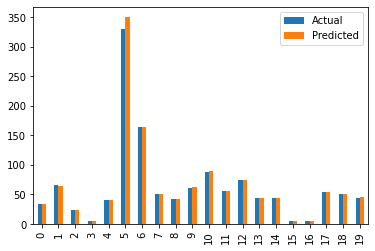

In [16]:
graph_data = data.head(20)
graph_data.plot(kind='bar')

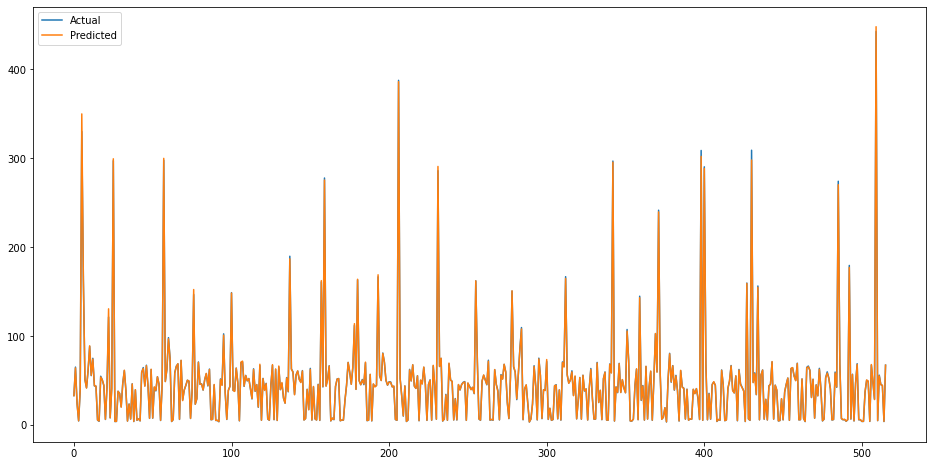

In [17]:
plt.figure(figsize=(16,8))
plt.plot(data['Actual'], label = "Actual")
plt.plot(data['Predicted'], label = "Predicted")
plt.legend()
plt.show()